In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Applications/anaconda3/lib/python3.8/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# leave room for other libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

targets = pd.get_dummies(df['koi_disposition'],drop_first=False)

df = pd.concat([df,targets],axis=1)
df.drop(['koi_disposition'],axis=1,inplace=True)
df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,1,0


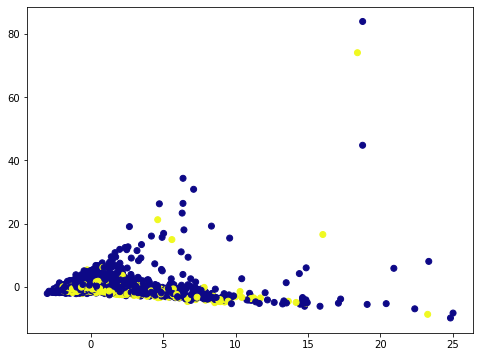

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target = df["CANDIDATE"]
data = df.drop("CANDIDATE",axis=1)
scaler.fit(data)
scaled_data = scaler.transform(data)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap="plasma")

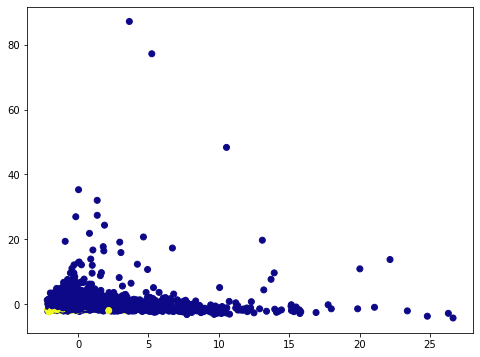

In [6]:
scaler = StandardScaler()

target = df["CONFIRMED"]
data = df.drop("CONFIRMED",axis=1)
scaler.fit(data)
scaled_data = scaler.transform(data)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap="plasma")

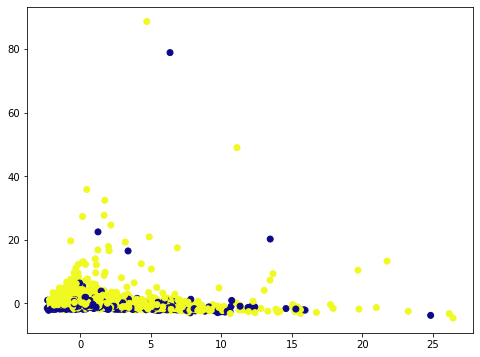

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target = df["FALSE POSITIVE"]
data = df.drop("FALSE POSITIVE",axis=1)
scaler.fit(data)
scaled_data = scaler.transform(data)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap="plasma")

In [8]:
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
Dummies = pd.get_dummies(df)

corr = Dummies.corr()
corr.style.background_gradient(cmap='coolwarm')